In [38]:
import cohere
import pandas
from cohere.responses.classify import Example

import asyncio
import nest_asyncio
nest_asyncio.apply()

async def wait_60_seconds():
    print("Waiting for 60 seconds...")
    await asyncio.sleep(60)
    print("60 seconds have passed. Now executing the code.")
    # Your code goes here

colnames=['Date', 'Yak'] 
df = pandas.read_csv("database.csv", names=colnames)


print(df)

import cohere  
co = cohere.Client('AdejHg0jqr05TQpHWauZ6J4RbfKrkFXDaoTkMOSP')
responses = {}

# test = df.iloc[0]["Yak"]

# prompt = "Using only one of the following six words (sadness, happiness, fear, anger, surprise and disgust), rank this statement as one of the six basic emotions, outputting only one of those six words: " + test

# response = co.generate(  
#     model='command-nightly',  
#     prompt = prompt,  
#     max_tokens=200, # This parameter is optional. 
#     temperature=0.750)

# intro_paragraph = response.generations[0].text
# print(test)
# print(intro_paragraph)


count = 0
for index, row in df.iterrows():
  if count >= 5:
     asyncio.run(wait_60_seconds())
     count = 0

  prompt = "I will give you a statement. I need you to return only one word which expresses the sentiment of the statement using the following words: admiration, amusement, anger, annoyance, approval, caring, confusion, curiosity, desire, disappointment, disapproval, disgust, embarrassment, excitement, fear, gratitude, grief, joy, love, nervousness, optimism, pride, realization, relief, remorse, sadness, surprise, neutral. The statement is: " + row['Yak'] + "DO NOT EXPLAIN YOUR ANSWER OR GIVE ME MORE THAN ONE WORD."
  try:
    response = co.generate(  
          model='command-nightly',  
          prompt = prompt,  
          max_tokens=200, # This parameter is optional. 
          temperature=0.750)
    intro_paragraph = response.generations[0].text
  except cohere.CohereError as e:
      print(e.message)
      print(e.http_status)
      print(e.headers)
      intro_paragraph = "error"
  responses[row['Yak']] = intro_paragraph
  print(row['Yak'], intro_paragraph)
  count += 1

print(responses)
df['emotion'] = df['Yak'].map(responses)

print(df)
df.to_csv('emotions.csv', index=False)

           Date                                                Yak
0    2023-11-19  im in the stay up too late, nap midday, stay u...
1    2023-11-20                           The wind is brutal today
2    2023-11-21  no matter how tough these next two weeks are, ...
3    2023-11-22  this school has done such a piss poor job with...
4    2023-11-23  Coffee and period shits lord forgive me what I...
..          ...                                                ...
204   2023-12-6  I do not like that man Dave Kittlesen. I do no...
205   2023-12-7  putting in the work early always pays off this...
206   2023-12-8  can we pls beg daniel to curve i cant take thi...
207   2023-12-9                                 bio more like cryo
208   2023-12-9           Did anyone just see what flew in the sky

[209 rows x 2 columns]
im in the stay up too late, nap midday, stay up too late bc im not tired cycle and its ruthless  Disapproval 
The wind is brutal today  Disappointment
no matter how tough t

my dear mother insists on buying me kind bars when im at school even after i tell her i dont like them. i feel bad but theyre so damn crunchy!  Embarrassment
Yall ever wonder how many pictures youre in and dont even know?  Curiosity. 
Roses are red
Violets are blue
Im in e-school
(Im better than you)

-an e-schooler  Disapproval
im an MLA girl forced to live in an APA world  Disapproval
Waiting for 60 seconds...
60 seconds have passed. Now executing the code.
Does anyone else here like actually not cheat?  approval
has anyone taken intro to wgs with hagerman..if so what is the cutoff for an A  Disappointment
Me wondering why I feel so depressed when I havent consistently taken my lexapro in months  Disappointment
AITA for telling my morbidly obese friend its time to put down the fork?  Disapproval
my best friend has changed so much since going to her university in nyc. im intimidated by the fact things are different now and i dont know how to deal with it  Intimidation and confusion. 


60 seconds have passed. Now executing the code.
I got that dracula flow  excitement
college is accepting that sometimes your rough draft is gonna be your final draft  Neutral. 
maybe the real final exam is the friends we make along the way  Optimism
do guys like short girls 
Im talking 51 411 short  curiosity
Are people going out tn?  curiosity
Waiting for 60 seconds...
60 seconds have passed. Now executing the code.
Just breathe everything will be alright  Relief
Has anyone else been asked out by that guy at Clark  Embarrassment
Ladies, what are some obvious things guys can do to make themselves more attractive that they never seem to do?  Embarrassment
Honor snacks at Clem are making my day  Joy
Why is scott stadium blue  curiosity
Waiting for 60 seconds...
60 seconds have passed. Now executing the code.
How is it legal to have a final from 7-10pm on a Friday or Saturday night. Suing for cruel and unusual punishment  Disapproval
my bf goes to jmu so ive educated all his friends on re

bio more like cryo  sadness 
Did anyone just see what flew in the sky  Surprise
{'im in the stay up too late, nap midday, stay up too late bc im not tired cycle and its ruthless': ' Disapproval ', 'The wind is brutal today': ' Disappointment', 'no matter how tough these next two weeks are, at least you arent hokie': ' relief', 'this school has done such a piss poor job with the academic transition here as a transfer student, they really have some balls having the audacity to ask for donations': ' Disapproval', 'Coffee and period shits lord forgive me what Im about to do to this bathroom': ' Disgust', 'the overwhelming urge to just start screaming in the middle of class': ' Embarrassment', 'I hate teachers that dont update grades. I had a 95 in a class so I felt safe to skip class and an assignment when I was having a bad day. Now my grades an 88 because she finally put in grades and thats before the assignment I didnt do -_-': ' Disappointment', 'I was FaceTiming my mom last night, Im 

In [39]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

           Date                                                Yak  \
0    2023-11-19  im in the stay up too late, nap midday, stay u...   
1    2023-11-20                           The wind is brutal today   
2    2023-11-21  no matter how tough these next two weeks are, ...   
3    2023-11-22  this school has done such a piss poor job with...   
4    2023-11-23  Coffee and period shits lord forgive me what I...   
5    2023-11-24  the overwhelming urge to just start screaming ...   
6    2023-11-20  I hate teachers that dont update grades. I had...   
7    2023-11-20  I was FaceTiming my mom last night, Im graduat...   
8    2023-11-21  4 hours of sleep, 2 cigarettes, no food, blast...   
9    2023-11-22  i wish i could just love/like/dislike emails i...   
10   2023-11-23  Is social psych a waste of tuition dollars if ...   
11   2023-11-20  Why would my guy friend suddenly fully stop ta...   
12   2023-11-21                    Professor Emery is retiring!:,(   
13   2023-11-22     

In [103]:
import string
df2 = df.copy(deep=True)
df2['emotion'] = df2['emotion'].str.strip()
df2['emotion'] = df2['emotion'].str.lower()
df2['emotion'] = df2['emotion'].str.strip(string.punctuation)

with pandas.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df2)

           Date                                                Yak  \
0    2023-11-19  im in the stay up too late, nap midday, stay u...   
1    2023-11-20                           The wind is brutal today   
2    2023-11-21  no matter how tough these next two weeks are, ...   
3    2023-11-22  this school has done such a piss poor job with...   
4    2023-11-23  Coffee and period shits lord forgive me what I...   
5    2023-11-24  the overwhelming urge to just start screaming ...   
6    2023-11-20  I hate teachers that dont update grades. I had...   
7    2023-11-20  I was FaceTiming my mom last night, Im graduat...   
8    2023-11-21  4 hours of sleep, 2 cigarettes, no food, blast...   
9    2023-11-22  i wish i could just love/like/dislike emails i...   
10   2023-11-23  Is social psych a waste of tuition dollars if ...   
11   2023-11-20  Why would my guy friend suddenly fully stop ta...   
12   2023-11-21                    Professor Emery is retiring!:,(   
13   2023-11-22     

In [104]:
import re
l = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']
for index, row in df2.iterrows():
    found = False
    for word in l:
        if re.search(r"\b"+word+r"\b",row['emotion']):
            df2.at[index,'emotion'] = word
            found = True
            break
    if not found:
        print(row)
        df2.drop(index, inplace=True)
        #df2.reset_index(drop=True, inplace=True)
            
        

Date                                              2023-11-19
Yak        my christmas list:\r\n- a fucking break\r\n- a...
emotion                                           exhaustion
Name: 37, dtype: object
Date                                              2023-11-20
Yak        i keep seeing references to the vt(vermont) sh...
emotion                                                worry
Name: 47, dtype: object
Date                                              2023-11-24
Yak        I feel like Im drowning and it doesnt matter i...
emotion                                              despair
Name: 51, dtype: object
Date                                              2023-11-23
Yak        Strong girl Nam-soon shouted out uva in episod...
emotion                                             laughter
Name: 59, dtype: object
Date                                              2023-11-25
Yak        Cant tell if the end of the semester is a mara...
emotion                                           

In [105]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df2)

           Date                                                Yak  \
0    2023-11-19  im in the stay up too late, nap midday, stay u...   
1    2023-11-20                           The wind is brutal today   
2    2023-11-21  no matter how tough these next two weeks are, ...   
3    2023-11-22  this school has done such a piss poor job with...   
4    2023-11-23  Coffee and period shits lord forgive me what I...   
5    2023-11-24  the overwhelming urge to just start screaming ...   
6    2023-11-20  I hate teachers that dont update grades. I had...   
7    2023-11-20  I was FaceTiming my mom last night, Im graduat...   
8    2023-11-21  4 hours of sleep, 2 cigarettes, no food, blast...   
9    2023-11-22  i wish i could just love/like/dislike emails i...   
10   2023-11-23  Is social psych a waste of tuition dollars if ...   
11   2023-11-20  Why would my guy friend suddenly fully stop ta...   
12   2023-11-21                    Professor Emery is retiring!:,(   
13   2023-11-22     

<Axes: xlabel='emotion'>

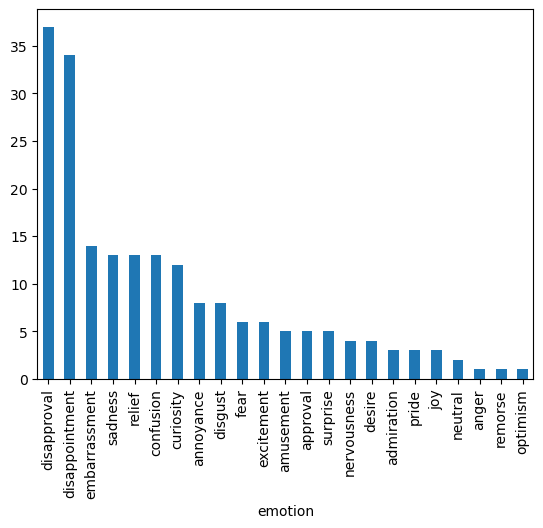

In [106]:
df2.emotion.value_counts().plot(kind='bar')

C:\Users\Owner\AppData\Local\Temp\ipykernel_12452\1573166836.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


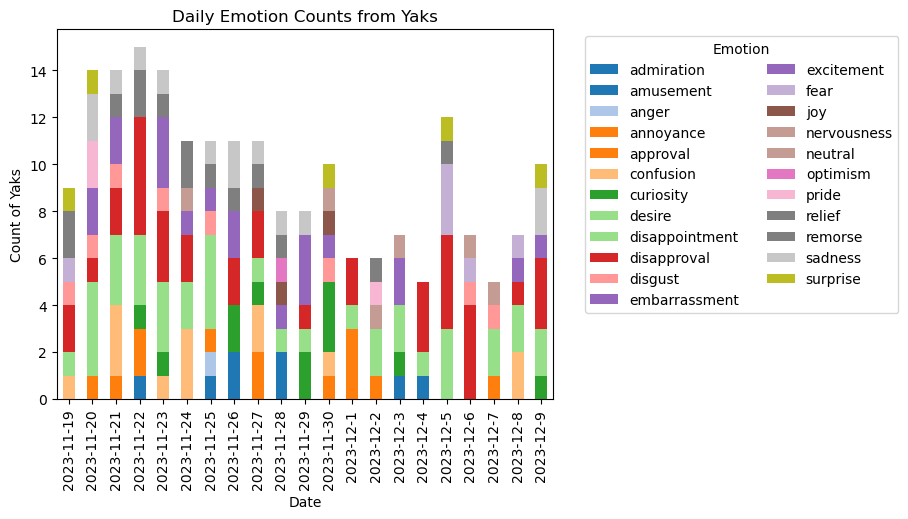

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

emotion_counts = df2.groupby(['Date', 'emotion']).size().unstack(fill_value=0)


# Plotting
cmap = get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, len(l))]
ax = emotion_counts.plot(kind='bar', stacked=True, color = colors)
plt.title('Daily Emotion Counts from Yaks')
plt.xlabel('Date')
plt.ylabel('Count of Yaks')

# Customize the legend with unique colors
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.show()

In [133]:
from tabulate import tabulate
dates_to_check = ['2023-11-20', '2023-11-25', '2023-11-30', '2023-12-5', '2023-12-9']
df2_new = df2[df2['Date'].isin(dates_to_check)].groupby('Date')['emotion'].agg(pd.Series.mode).to_frame()
print(tabulate(df2_new, headers = 'keys', tablefmt = 'psql'))

+------------+----------------+
| Date       | emotion        |
|------------+----------------|
| 2023-11-20 | disappointment |
| 2023-11-25 | disappointment |
| 2023-11-30 | curiosity      |
| 2023-12-5  | disapproval    |
| 2023-12-9  | disapproval    |
+------------+----------------+
